<h1 style="text-align:center"> Basic Neural Network Regression Model Building</h1>
<h2 style="text-align:center"> A Codecademy Pro Project </h2> <br>

This project serves as my first attempt at building neural network models. My aim was to predict an applicant's chance of admittance to a Master’s Degree program. Before building the models, I conducted some exploratory data analysis and found that most of the continuous quantitative variables had a clear (visual) association with chances of admission. With this information in hand, I built two slightly different neural network regression models, varying in the number of hidden layers and "neurons" per layer; I then compared the results of my two neural network regression models with two other regression models I am familiar with, namely multi-variable linear regression and k-Nearest Neighbours regression. As might be expected from a small (~500 rows) data set whose continuous quantitative variables were clearly (visually) associated with chances of admission, the "goodness of fit" values for the four models are very similar, with a simple multi-variable linear regression model having the highest "goodness of fit" score and the k-Nearest Neighbours model having the lowest "goodness of fit" score. When additionally considering speed of computation, it is clear that the multi-variable linear regression model is the best one to choose for predicting chances of admission to grad school using this data set. <br>

This notebook is broken down into the following sections:<br>
<ul>
    <li> <a href='#Section1'> The Data </a> </li>
    <li> <a href='#Section2'> Importing Needed Software Libraries </a> </li>
    <li> <a href='#Section3'> Initializing Random Number Seeds </a> </li>
    <li> <a href='#Section4'> Reading in the Data and Cleaning It </a> </li>
    <li> <a href='#Section5'> Exploratory Data Analysis </a> </li>
    <li> <a href='#Section6'> Data Scaling and Training/Validation/Test Subset Creation </a> </li>
    <li> <a href='#Section7'> Building and Fine Tuning the Neural Network Regression Models </a> </li>
    <li> <a href='#Section8'> Building and Fine Tuning Comparison Regression Models </a> </li>
    <li> <a href='#Section9'> Comparison of Model Performances </a> </li>
    <li> <a href='#Section10'> Conclusions </a> </li>
    <li> <a href='#Section11'> Acknowledgements </a> </li>
</ul>

***
<a id="Section1"></a> 

<h3 style="text-align:center"> The Data </h3> <br>
The data used in the project were provided by Codecademy; they in turn downloaded the data from Mohan S. Acharya's <a href = "https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv"> Kaggle repository</a>. The data set's description says that it was created "for prediction of Graduate Admissions from an Indian perspective." Given that one of the features was a student's TOEFL score, the universities that the students applied to were likely located outside of India; however, I am not certain that this is indeed the case. As detailed both on the <a href = "https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv"> Kaggle repository</a> and by Codecademy, the data set contains the following nine features: <br>
<table>
   <th>Feature</th>
   <th style="text-align:left"> 
       Description</th>
   <tr>
     <td>Serial No. </td>
     <td style="text-align:left"> Index of each row (1-500) </td>
    </tr>
    <tr>
      <td>GRE Score</td>
      <td style="text-align:left"> GRE test score (out of 340) </td>
    </tr>
    <tr>
      <td>TOEFL Score</td>
      <td style="text-align:left"> TOEFL test score (out of 120) </td>
    </tr>
    <tr>
     <td>University Rating</td>
     <td style="text-align:left"> Evaluated university rating (out of 5) </td>
    </tr>
    <tr>
     <td>SOP</td>
     <td style="text-align:left"> Statement of Purpose Strength (out of 5) </td>
   </tr>
     <tr>
     <td>LOR</td>
     <td style="text-align:left"> Letter of Recommendation Strength (out of 5) </td>
   </tr>
        <tr>
     <td>CGPA</td>
     <td style="text-align:left"> Undergraduate GPA (out of 10) </td>
   </tr>
        <tr>
     <td>Research</td>
     <td style="text-align:left"> Has research experience (either 0 or 1) </td>
   </tr>
        <tr>
     <td>Chance of Admit</td>
     <td style="text-align:left"> Applicant’s chance of being admitted (ranging from 0 to 1) </td>
   </tr>
</table>
The column "Chance of Admit" is what I will build machine learning models to predict. The other columns, save for "Serial No.," will be the features used to train those models.

***
<a id="Section2"></a> 

<h3 style="text-align:center"> Importing Needed Software Libraries </h3> <br>
Several software libraries will be used to clean the data, normalize it, visualize it, and build machine learning models to predict the feature "Chance of Admit."

In [1]:
# Import data storage and manipulation library:
import pandas as pd

# Import graphing libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# Import pseudo-random number generating library:
import random

In [2]:
# From the scikit-learn library ...

# Import train/test dividing method:
from sklearn.model_selection import train_test_split

# Import scaling class:
from sklearn.preprocessing import MinMaxScaler

# Import regression classes:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Import model evaluation methods:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# From the TensorFlow library ...

# import the main library:
import tensorflow as tf

# Import the neural network model building class:
from tensorflow.keras.models import Sequential

# Import neural network layer building classes:
from tensorflow.keras.layers import InputLayer, Dense, Dropout

# Import the optimizer method:
from tensorflow.keras.optimizers import Adam

# Import the early stopping class:
from tensorflow.keras.callbacks import EarlyStopping

***
<a id="Section3"></a> 

<h3 style="text-align:center"> Initializing Random Number Seeds </h3> <br>
I would like it to be the case that, each time the kernel is run, the same splitting of data between training, validation, and test subsets occurs. This is particularly important when building my neural network regression models, because I cannot explicitly specify a random state for the splitting of the input training data set into training and validation subsets. The below isn't perfect, as the same exact splitting cannot be used for each call to .fit(), but it at least ensures that the same cycle of splitting occurs each time the kernel is run.

In [4]:
# Create a well-defined initial state for random numbers generated in the code.
# This is done to ensure reproducability in the neural network models I will be building.

# This idea came from https://gist.github.com/CircleOnCircles/87a6dc0b8884affb2a546ca6036cad04 :

# Start Python-generated random numbers in a well-defined initial state:
random.seed(15)

# Start TensorFlow-generated random numbers in a well-defined initial state:
tf.random.set_seed(15)

# Note that, since this notebook is running Python 3.8, the PYTHONHASHSEED must be set to 0 when Jupyter Notebook
# is started. This is done by typing the following at the command prompt:
# PYTHONHASHSEED=0 jupyter notebook

***
<a id="Section4"></a> 

<h3 style="text-align:center"> Reading in the Data and Cleaning It </h3> <br>
The data set must be read into Python before any analysis can be done. I will read it into a Pandas DataFrame, because this data organization structure is easy to work with and very flexible in terms of the data structures it permits.

In [5]:
# Read in the graduate admissions data:
grad_admit_data = pd.read_csv('admissions_data.csv')

# Print out the DataFrame information:
print(grad_admit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [6]:
# The "Serial No." axis is unnecessary, as it is just an index identifier and does not correlate with chance of
# admission. Records can be indexed in the DataFrame without needing a separate indexing column.
grad_admit_data = grad_admit_data.drop(["Serial No."], axis = 1)

In [7]:
# Two of the column names have a whitespace at their ends. Remove these white spaces to make accessing the columns
# easier:
grad_admit_data.rename(columns = {'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace = True)

# Print out the DataFrame information again, to ensure that nothing blatantly obvious has gone wrong:
print(grad_admit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
None


***
<a id="Section5"></a> 

<h3 style="text-align:center"> Exploratory Data Analysis </h3> <br>
If I want to build machine learning models which predict a students' chances of admittance to a Master’s Degree program, I had better know which variables are associated with those chances and which are not. Conducting basic exploratory data analysis will allow me to determine this. Since I am primarily interested in how chances of admittance trends with features, I will forgo analysis of feature averages, medians, interquartile ranges, etc. in lieu of scatter plots of chances of admittance vs. features. These scatter plots will allow me to visually tell if "Chance of Admit" is correlated with a feature.

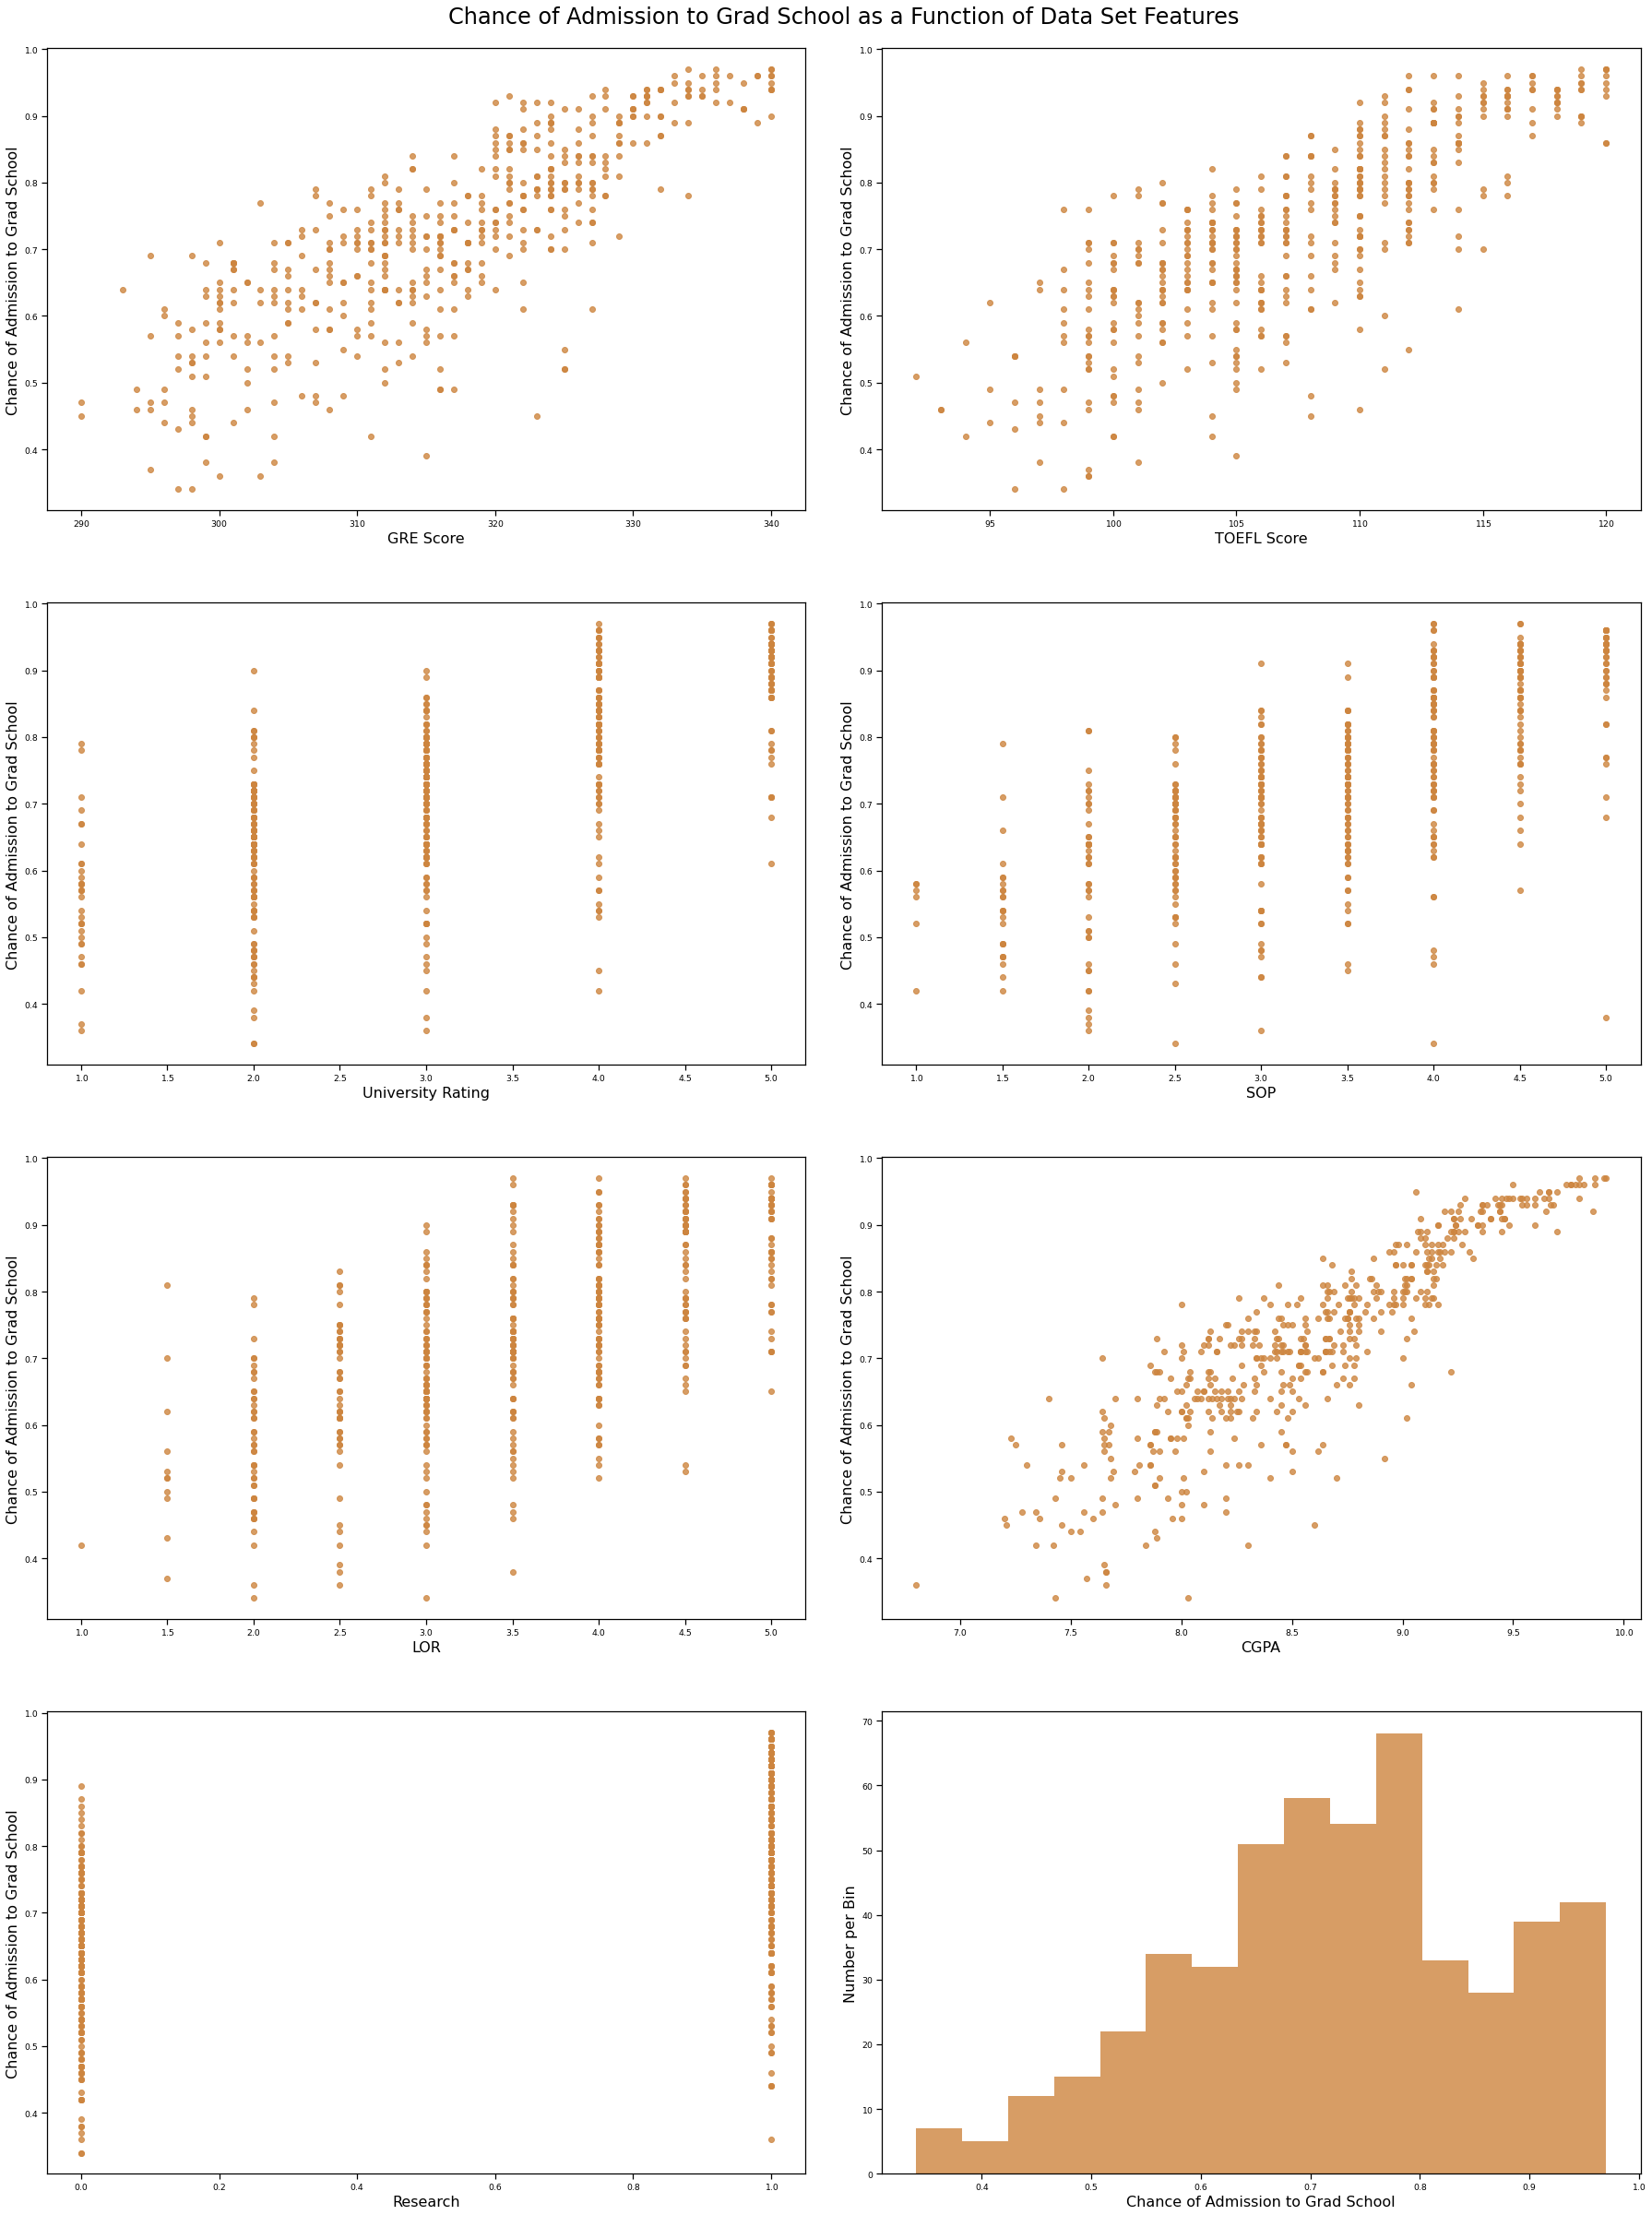

In [8]:
# Give the figure a nice, big size:
fig = plt.figure(figsize=(24,32))

# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})

# Set spacing for subplots:
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.2, wspace = 0.1)

# Loop over features in the DataFrame and plot "Chance of Admit" vs. each feature as a scatterplot:
for i in range(7):
    # Ge the name of this column:
    cname = str(grad_admit_data.columns[i])
    # Add a subplot to the figure:
    fig.add_subplot(4,2,i+1)
    # Plot the scatterplot for this column:
    plt.scatter(grad_admit_data[cname], grad_admit_data['Chance of Admit'], alpha = 0.8, color = 'peru')
    # Label the plot axes with informative labels:
    plt.xlabel(cname, fontsize=16)
    plt.ylabel("Chance of Admission to Grad School", fontsize=16)
# Add one more subplot to the figure:
fig.add_subplot(4,2,8)
# Plot the distribution of "Chance of Admit:"
plt.hist(grad_admit_data['Chance of Admit'], bins = 15,  alpha = 0.8, color = 'peru')
# Label the plot axes with informative labels:
plt.xlabel('Chance of Admission to Grad School', fontsize=16)
plt.ylabel('Number per Bin', fontsize=16)

# Give the figure an informative title:
plt.suptitle('Chance of Admission to Grad School as a Function of Data Set Features', x = 0.5, y = 1.02, \
              fontsize=24)

# Save the figure to file:
plt.savefig('features_v_chance_of_admission.png')

# Display the figure:
plt.show()

From the above plots, I infer the following:
1. Chance of Admission to Grad School vs. GRE score: There is a clear visual association between GRE Score and "Chance of Admit:" as one increases, so does the other. To my eye, the relationship between these features is non-linear; however, in order to say that for sure I would need find the Pearson correlation coefficient between these two variables and see how close it is to 1. I could also find the Spearman rank correlation coefficient between the two features to see if the relationship between them is monotonic. Since this is a small, brief project, I will forgo this analysis and stick with my visually-determined conclusion that the two features are associated.
2. Chance of Admission to Grad School vs. TOEFL Score: There is a clear visual association between TOEFL score and "Chance of Admit:" as one increases, so does the other, at least in broad terms. I will again forgo determining the Pearson correlation coefficient and Spearman rank correlation coefficient and stick with my visual interpretation of the plot.
3. Chance of Admission to Grad School vs. University Rating: Despite the data type of the feature "University Rating" being float, the feature itself seems to be ordinal categorical. This explains the five vertical lines which comprise the scatter plot. I do note that, as University Rating increases, the density of points at the "top" of the bar (i.e., at higher chances of admission) seems to increase as well. This suggests an association between "Chance of Admit" and "University Rating."
4. Chance of Admission to Grad School vs. SOP: Like "University Rating," "SOP" seems to be an ordinal categorical variable despite its float type. There are nine vertical lines on the scatter plot, one at each half-integer value of "SOP." Once again, as "SOP" increases, the density of points at the "top" of each vertical line increases, broadly speaking. This suggests an association between "SOP" and "Chance of Admit." 
5. Chance of Admission to Grad School vs. LOR: "LOR" is another ordinal categorical variable which just so happens to have a float data type. Like the scatter plot of Chance of Admission to Grad School vs. SOP, the scatter plot of Chance of Admission to Grad School vs. LOR has nine vertical lines. The association between "LOR" and "Chance of Admit" is even clearer than it was for the previous two ordinal categorical features, as one can see an upward trend in the vertical lines (i.e., vertical lines at higher LOR values "start" at higher values of "Chance of Admit) as well as a higher density of values at the "top" of lines as LOR value increases.
6. Chance of Admission to Grad School vs. CGPA: Once again, there is a clear visual association between the continuous quantitative variable CGPA and "Chance of Admit." The association again seems to be non-linear, as the plot seems to plateau at high values of CGPA. Nonetheless, the trend of increasing chance of admission to grad school as CGPA increases is clear from the plot.
7. Chance of Admission to Grad School vs. Research: As expected for the binary categorical variable "Research," there are two vertical lines on the scatter plot. I do note that the vertical line at a value of 1, which denotes that the student does have research experience, reaches a higher value of "Chance of Admit" than does the vertical line at 0, and that the points are more "top dense" than they are for the vertical line at 1. This suggests a (perhaps weak) association between "Chance of Admit" and "Research." 
8. This plot shows the distribution of "Chance of Admit" values in the data set. The distribution is skew-left, with a peak at about 0.75. There seems to be a secondary peak at 0.95, as the distribution starts increasing again after a sharp drop-off between 0.75 and 0.8.

***
<a id="Section6"></a> 

<h3 style="text-align:center">Data Scaling and Training/Validation/Test Subset Creation </h3> <br>
Since the data are on a variety of scales, I will need to scale them before building and training machine learning models which use them to predict "Chance of Admit." I will also need to divide the data into training, validation, and test subsets for use in training and evaluating my models, in addition to fine tuning model hyperparameters. 

In [9]:
# From the DataFrame, select the features to be included in my models:
features = grad_admit_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
# Select the labels/targets that I am interested in predicting:
targets = grad_admit_data['Chance of Admit']

In [10]:
# Define the ratios of training/validation/test data subsets. As percentages of the whole data set, I am choosing to
# partition ...
# 70% of the data into the training subset
# 20% of the data into the validation subset
# 10% of the data into the test subset
ratio_train = 0.70
ratio_valid = 0.20
ratio_test = 0.10

# Make sure that, when the validation subset is separated from the training subset, the fractions defined above
# are preserved:
ratio_valid_adjusted = ratio_valid / (1 - ratio_test)

# Split the data into test/“nottest” sets:
feats_nottest, feats_test, targets_nottest, targets_test = \
     train_test_split(features, targets, test_size = ratio_test, random_state = 15)

# Split the "nottest" data into training and validation sets for the k-Nearest Neighbours Regression model:
feats_train, feats_valid, targets_train, targets_valid = \
     train_test_split(feats_nottest, targets_nottest, test_size=ratio_valid_adjusted, random_state = 15)

Note that the validation data subset defined above will be used primarily to fine tune the k-Nearest Neighbours model's hyperparameter k (i.e., the number of nearest neighbours used to estimate "Chance of Admit"). In principle, it should be possible to use this data subset to fine tune my neural networks' hyperparameters as well, but in practice I was not able to figure out how to do this; providing a validation data set to Keras's model.fit() method requires the data to be in one of four specific forms, and I was unable to figure out how to get my present validation subset into any of them. I will attempt to figure this out for future projects, though, as I feel it will be important to be able to do.

In [11]:
# Scale the data such that each feature lies within the range [0,1]:

# Instantiate a MinMaxScaler() object:
minmaxscaler = MinMaxScaler()
# Fit the object to the "nottest" data subset:
feats_nottest_scaled = minmaxscaler.fit_transform(feats_nottest)
# Scale the training, validation, and test subsets using the fit MinMaxScaler() object:
feats_test_scaled = minmaxscaler.transform(feats_test)
feats_train_scaled = minmaxscaler.transform(feats_train)
feats_valid_scaled = minmaxscaler.transform(feats_valid)

***
<a id="Section7"></a> 

<h3 style="text-align:center"> Building and Fine Tuning the Neural Network Regression Models </h3> <br>
Before building my two neural network regression models, I will establish a baseline whose performance the models need to improve upon. The layers of the models are compiled in separate functions to make the models' constructions easier to follow. Model 1 consists of 1 hidden layer of 256 neurons with a sigmoid activation function and no drop-out layer; Model 2 consists of 2 hidden layers of 16 neurons a piece, with dropout layers after each hidden layer and with each hidden layer having a sigmoid activation function. Both models use an Adam optimization algorithm as their optimizer. Once the models are compiled and built, they are trained on the training data.

In [12]:
# Get baseline figures for MSE and MAE; my models need to do better than this:

# Instantiate a DummyRegressor(). Have it "guess" the average of "Chance of Admit" for each data point:
baseline_regressor = DummyRegressor(strategy="mean")
# Fit the DummyRegressor() object to the data:
baseline_regressor.fit(feats_nottest_scaled, targets_nottest)
# Make predictions based on the fit DummyRegressor() object:
baseline_chanceofadmit_predictions = baseline_regressor.predict(feats_test_scaled)

# Calculate the baseline MSE and baseline MAE based on the DummyRegressor()'s performance:
baseline_MSE = mean_squared_error(targets_test, baseline_chanceofadmit_predictions)
baseline_MAE = mean_absolute_error(targets_test, baseline_chanceofadmit_predictions)

print("Baseline MSE: " + str(round(baseline_MSE,3)))
print("Baseline MAE: " + str(round(baseline_MAE,3)))

Baseline MSE: 0.018
Baseline MAE: 0.108


In [13]:
# Build the framework of a one-layer neural network model:

def build_a_model(data):
    # Figure out how many features the input data have:
    num_of_vars = data.shape[1]
    # Instantiate an InputLayer() object for the model's input layer, making sure that it has the correct shape:
    inputs = InputLayer(input_shape=(num_of_vars,))
    
    # Build the model's framework. Begin by instantiating a Sequential() object:
    thismodel = Sequential()
    # Add the input layer to the model:
    thismodel.add(inputs)
    # Add a hidden layer with 256 perceptrons and a sigmoid activation function:
    thismodel.add(Dense(256, activation='sigmoid'))
    # Add the output layer:
    thismodel.add(Dense(1))
    # Specify the optimizer which will be used to fine-tune the model's parameters, and set its learning rate:
    theoptimizer = Adam(learning_rate=0.01)
    # Compile the model, specifying the metric to be minimized (i.e., what plays the role of "loss"),
    # other metrics to keep track of, and the optimization method to be used:
    thismodel.compile(loss='mse',  metrics=['mae'], optimizer=theoptimizer)
    
    return thismodel

In [14]:
# Build the framework of a two-layer neural network model:

def build_a_different_model(x):
    # Figure out how many features the input data have:
    nvar = x.shape[1]
    # Instantiate an InputLayer() object for the model's input layer, making sure that it has the correct shape:
    ins = InputLayer(input_shape=(nvar,))
    
    # Build the model's framework. Begin by instantiating a Sequential() object
    amodel = Sequential()
     # Add the input layer to the model:
    amodel.add(ins)
    # Add a hidden layer with 16 perceptrons and a sigmoid activation function:
    amodel.add(Dense(16, activation='sigmoid'))
    # Perform regularization by implementing a dropout technique. More specifically, have 10% of the above layer
    # outputs set to zero:
    amodel.add(Dropout(0.1))
    # Add a hidden layer with 16 perceptrons and a sigmoid activation function:
    amodel.add(Dense(16, activation='sigmoid'))
    # Have 10% of the above layer outputs set to zero:
    amodel.add(Dropout(0.1))
    # Add the output layer:
    amodel.add(Dense(1)) 
    # Specify the optimizer which will be used to fine-tune the model's parameters, and set its learning rate:
    optimum = Adam(learning_rate=0.006)
    # Compile the model, specifying the metric to be minimized (i.e., what plays the role of "loss"),
    # other metrics to keep track of, and the optimization method to be used:
    amodel.compile(loss='mse',  metrics=['mae'], optimizer=optimum)
    
    return amodel

In [15]:
# Instantiate an EarlyStopping() object to stop the model's training if the loss function hits a plateau, or
# if loss starts increasing after having reached a minimum:
estop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

In [16]:
# Build two different neural network models. Each model will be trained on data from the feats_nottest_scaled data
# subset, but due to the nature of the model fitting (i.e., model training) method in Keras the precise training and 
# validation subsets will be slightly different.
grad_admit_model_1 = build_a_model(feats_nottest_scaled)
grad_admit_model_2 = build_a_different_model(feats_nottest_scaled)

Note that in the below two cells, when the neural network regression models I built above are trained, the "feats_nottest_scaled" data subset is passed to model.fit(). This is no accident, as I will need to split off ratio_valid_ajusted percent of the "training" set to serve as the validation data subset. This is precisely what the "feats_nottest_scaled" was designed to be--a combination of the training and validation data subsets--so that is why it is passed to model.fit(). Had I been able to pass model.fit() an explicit validation data subset to use, "feats_train_scaled" would have been passed as the training set. 

In [17]:
# Train the first neural network model on the feats_nottest_scaled data subset. Select 22.22% of this subset to be set
# aside for a validation subset which will be used to gauge model performance at the end of each epoch. Specify that
# the training data should NOT be shuffled before each epoch. Select the number of epochs to iterate over, a batch 
# size, and let the fitter know that there's an EarlyStopping() object.
model_history_1 = grad_admit_model_1.fit(feats_nottest_scaled, targets_nottest, \
                                         validation_split = ratio_valid_adjusted, \
                                         shuffle = False, epochs = 90, batch_size = 1, \
                                         callbacks=[estop], verbose = 0)

# Use the newly-trained model to predict "Chance of Admit" for the test data subset:
grad_admit_predictions_1 = grad_admit_model_1.predict(feats_test_scaled)

# Calculate model performance as judged by the MSE, MAE, and r^2 values:
model_mse_1, model_mae_1 = grad_admit_model_1.evaluate(feats_test_scaled, targets_test, verbose = 0)
model_rsquared_1 = r2_score(targets_test, grad_admit_predictions_1)

# Print out the model performance metrics:
print("Model 1 MSE: " + str(round(model_mse_1,5)))
print("Model 1  MAE: " + str(round(model_mae_1,4)))
print('Model 1 "Goodness of Fit:" ' + str(round(model_rsquared_1,3)))

Epoch 00077: early stopping
Model 1 MSE: 0.00368
Model 1  MAE: 0.0437
Model 1 "Goodness of Fit:" 0.795


In [18]:
# Train the second neural network model on the feats_nottest_scaled data subset. Select 22.22% of this subset to be set
# aside for a validation subset which will be used to gauge model performance at the end of each epoch. Specify that
# the training data should NOT be shuffled before each epoch. Select the number of epochs to iterate over, a batch 
# size, and let the fitter know that there's an EarlyStopping() object.
model_history_2 = grad_admit_model_2.fit(feats_nottest_scaled, targets_nottest, \
                                         validation_split = ratio_valid_adjusted, \
                                         shuffle = False, epochs = 200, batch_size = 1, \
                                         callbacks=[estop], verbose = 0)

# Use the newly-trained model to predict "Chance of Admit" for the test data subset:
grad_admit_predictions_2 = grad_admit_model_2.predict(feats_test_scaled)

# Calculate model performance as judged by the MSE, MAE, and r^2 values:
model_mse_2, model_mae_2 = grad_admit_model_2.evaluate(feats_test_scaled, targets_test, verbose = 0)
model_rsquared_2 = r2_score(targets_test, grad_admit_predictions_2)

# Print out the model performance metrics:
print("Model 2 MSE: " + str(round(model_mse_2,5)))
print("Model 2 MAE: " + str(round(model_mae_2,4)))
print('Model 2 "Goodness of Fit:" ' + str(round(model_rsquared_2,3)))

Epoch 00138: early stopping
Model 2 MSE: 0.00373
Model 2 MAE: 0.045
Model 2 "Goodness of Fit:" 0.792


***
<a id="Section8"></a> 

<h3 style="text-align:center"> Building and Fine Tuning Comparison Regression Models </h3> <br>
Since the continuous quantitative features of the data set show a clear association with "Chance of Admit," and the ordinal categorical variables also show weaker evidence of association with "Chance of Admit," I hypothesized that a simple multi-variable linear regression model would probably do a more than adequate job of predicting "Chance of Admit." I also wanted to compare my neural network regression models to another machine learning model I had used in the past, namely a k-Nearest Neighbours regression model.

In [19]:
# Build a linear regression model for the data:

# Instantiate a LinearRegression() object:
lin_regress = LinearRegression()
# Fit the object to the feats_nottest_scaled data:
lin_regress.fit(feats_nottest_scaled, targets_nottest)

# Use the newly-trained model to predict chances of admission for the test data subset:
lin_regress_predict = lin_regress.predict(feats_test_scaled)

# Print out the model performance metrics:
print("Lin. R. MSE: " + str(round(mean_squared_error(targets_test, lin_regress_predict),5)))
print("Lin. R. MSE: " + str(round(mean_absolute_error(targets_test, lin_regress_predict),4)))
print("Lin. R. MSE: " + str(round(r2_score(targets_test, lin_regress_predict),3)))

Lin. R. MSE: 0.00364
Lin. R. MSE: 0.0439
Lin. R. MSE: 0.797


In [20]:
# Build a k-Nearest Neighbours Regression model for the data:

# An empty array to store model scores:
scores_all = []

# Loop over a range of ks, build a kNN Regression model, and calculate the coefficient of determination when
# applied to the validation data:
for k in range(1,len(feats_train_scaled)+1):
    # Instantiate a KNeighborsRegressor() object with the correct number of nearest neighbours specified:
    regressor = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    # Fit the model to the training data:
    regressor.fit(feats_train_scaled, targets_train)
    # Use the newly-trained model to predict "Chance of Admit" for the validation data subset:
    predictions = regressor.predict(feats_valid_scaled)
    # Calculate the MSE and append that value to the list MSEs for each model:
    scores_all.append(mean_squared_error(targets_valid, predictions))

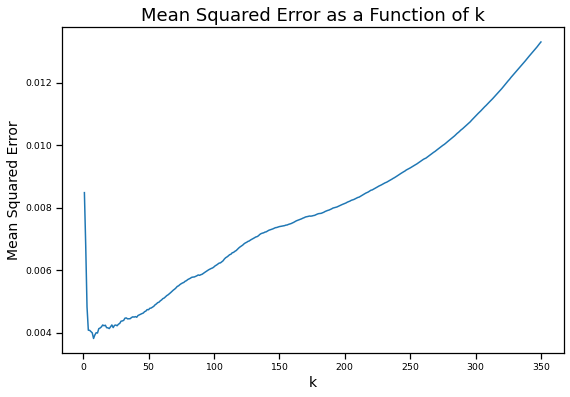

In [21]:
# Check to make sure that the trend of MSE with k is expected:

# Give the figure an appropriate size:
plt.figure(figsize=(9,6))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot MSE as a function of k:
plt.plot(range(1,len(feats_train_scaled)+1),scores_all)
# Label the plot axes with informative labels:
plt.xlabel('k', fontsize = 14)
plt.ylabel('Mean Squared Error', fontsize = 14)
# Give the figure an informative title:
plt.title('Mean Squared Error as a Function of k', fontsize = 18)
# Save the figure to file:
plt.savefig('MSE_as_f_of_k.png')
# Display the plot:
plt.show()

In [22]:
# Build the "final" model with the k which minimized the MSE:
knn_regress = KNeighborsRegressor(n_neighbors = scores_all.index(min(scores_all))+1, weights = 'distance')
# Fit the model to the "nottest" data:
knn_regress.fit(feats_nottest_scaled, targets_nottest)
# Use the newly-trained model to predict "Chance of Admit" for the test data subset:
knn_values_predicts = knn_regress.predict(feats_test_scaled)

# Calculate model performance as judged by the MSE, MAE, and r^2 values:
knn_regress_score = r2_score(targets_test, knn_values_predicts)
knn_regress_mse = mean_squared_error(targets_test, knn_values_predicts)
knn_regress_mae = mean_absolute_error(targets_test, knn_values_predicts)

# Print out the model performance metrics:
print("KNN R. MSE: " + str(round(knn_regress_mse,5)))
print("KNN R. MSE: " + str(round(knn_regress_mae,4)))
print("KNN R. MSE: " + str(round(knn_regress_score,3)))

KNN R. MSE: 0.00466
KNN R. MSE: 0.049
KNN R. MSE: 0.74


***
<a id="Section9"></a> 

<h3 style="text-align:center"> Comparison of Model Performances </h3> <br>
The metric I used to evaluate my models' performances was mean squared error (MSE), although I also kept track of mean absolute error (MAE) as well. Models with smaller MSEs and MAEs do a better job of describing the data than do models with larger MSEs and larger MAEs. While these two metrics are commonly used to evaluate a regression model's performance, the "goodness of fit" score (i.e., the $r^2$ value) is perhaps the most well-known metric. The closer the "goodness of fit" gets to 1, the better the job a model does of describing the data. Below are the MSE, MAE, and $r^2$ values for each of my four machine learning regression models:

<table>
   <th style="text-align:center"> Model </th>
   <th style="text-align:center"> MSE </th>
   <th style="text-align:center"> MAE</th>
   <th style="text-align:center"> $r^2$</th>
   <tr>
     <td>Neural Network Model 1 </td>
     <td style="text-align:center"> 0.00368 </td>
     <td style="text-align:center"> 0.0437 </td>
     <td style="text-align:center"> 0.795 </td>
    </tr>
    <tr>
     <td>Neural Network Model 2 </td>
     <td style="text-align:center"> 0.00373 </td>
     <td style="text-align:center"> 0.045 </td>
     <td style="text-align:center"> 0.792 </td>
    </tr>
    <tr>
     <td> <font color = "red">Multi-Variable Linear Regression </font> </td>
     <td style="text-align:center"> <font color = "red"> 0.00364 </font> </td>
     <td style="text-align:center"> <font color = "red"> 0.0439 </font> </td>
     <td style="text-align:center"> <font color = "red"> 0.797 </font> </td>
    </tr>
    <tr>
     <td>k-Nearest Neighbours </td>
     <td style="text-align:center"> 0.00466 </td>
     <td style="text-align:center"> 0.049 </td>
     <td style="text-align:center"> 0.74 </td>
    </tr>
</table>

As is apparent from the table, the multi-variable linear regression model and both neural network regression models had almost identical performances. The MSE, MAE, and $r^2$ values are about the same for all three models when rounded to two non-zero digits. The multi-variable linear regression model's MSE and MAE values are slightly lower than those of the other three models, and its $r^2$ value is slightly higher than that of the other three models, so formally it is the best model. But as I stated above, all models except the k-Nearest Neighbours model had about the same performance. In terms of computing time, building, and training the multi-variable linear regression model took the least amount of time, followed by Neural Network Model 1, the k-Nearest Neighbours model, and Neural Network Model 2. Combining computation time with performance, it is clear that the multi-variable linear regression model is the best one to use to predict "Chance of Admit" for this data set. <br>
<br>
Tables of performance metrics are nice, but it is also nice to have a visualization of how the models performed. Below, I plot the predicted value of "Chance of Admit" vs. the actual value of "Chance of Admit" for each model. The black line in the figure represents a perfect prediction; along this line, the predicted value of "Chance of Admit" is exactly the same as the actual value. If a model had an $r^2$ score of 1, or an MSE of 0, all of its predictions would lie along this line. Clearly, this was not the case. However, it is also evident that the models' performances are not all that different from each other.

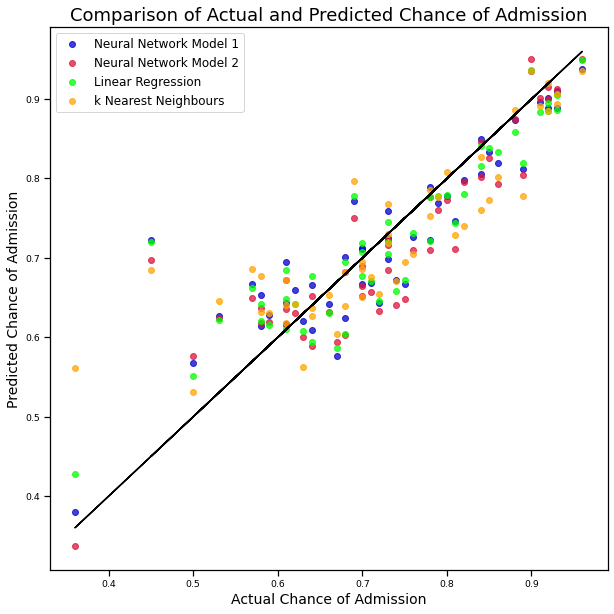

In [23]:
# Visualize how each models' predictions compare to the actual "Chance of Admit" values.

# Set up a line along which the actual "Chance of Admit" is the same as the predicted one.
# In other words, perfect predictions will lie along this line:
equal_line = targets_test

# Give the figure an appropriate size:
plt.figure(figsize = (10,10))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot scatter plots for the predictions of each model vs. the actual "Chance of Admit":
plt.scatter(targets_test, grad_admit_predictions_1, color = 'mediumblue', alpha = 0.75)
plt.scatter(targets_test, grad_admit_predictions_2, color = 'crimson', alpha = 0.75)
plt.scatter(targets_test, lin_regress_predict, color = 'lime', alpha = 0.75)
plt.scatter(targets_test, knn_values_predicts, color = 'orange', alpha = 0.75)
# Give the plot a legend:
plt.legend(['Neural Network Model 1', 'Neural Network Model 2', 'Linear Regression',\
            'k Nearest Neighbours'], loc='upper left', fontsize = 12)
# Plot the prediction = actual line:
plt.plot(targets_test, equal_line, color = 'black')
# Label the plot axes with informative labels:
plt.xlabel('Actual Chance of Admission', fontsize = 14)
plt.ylabel('Predicted Chance of Admission', fontsize = 14)
# Give the figure an informative title:
plt.title('Comparison of Actual and Predicted Chance of Admission', fontsize = 18)
# Save the figure to file:
plt.savefig('predicted_coa_vs_actual_coa.png')
# Display the plot:
plt.show()

All models tended to underpredict "Chance of Admit" for actual values between 0.6 and 0.9. All models did their best work when predicting "Chance of Admit" for actual values greater than 0.95. <br>
<br>
Note that there is considerable scatter about the "predicted = actual" line. One way of thinking about "goodness of fit" for the models I built is that its value tells you how much of the variability in "Chance of Admit" a model can account for. Across the board for the four models I built, that value is about 80%. So, my models can account for about 80% of the variability in the data. This implies that about 20% of the variability in "Chance of Admit" cannot be accounted for by my models. Since my models' performances depend on the training data I give them, this in turn implies that the features I gave the models can account for about 80% of the variability in "Chance of Admit." The other 20% of variability is due to unaccounted for factors. This makes sense to me, as there are factors which contribute to one's chances of admittance to grad school that are out of the control of the applicant: how many other applicants applied to the program that year, how many openings were there in the program that year, etc. These factors naturally cannot be included in a data set of this nature. <br>
<br>
Below, I plot both MSE and MAE as a function of epoch for each of my neural network regression models. I note that, because of the dropout layers incorporated into my second neural network model, its MSE and MAE as a function of epoch are "smoother" than the MSE and MAE as a function of time of my first neural network model. I note with some dismay that the MSE and MAE of the second neural network model do not seem to have visually converged in their plots despite the early stopping condition having been triggered. Perhaps the network got stuck in a local minimum, or perhaps the learning rate has not been as optimized as it could be.

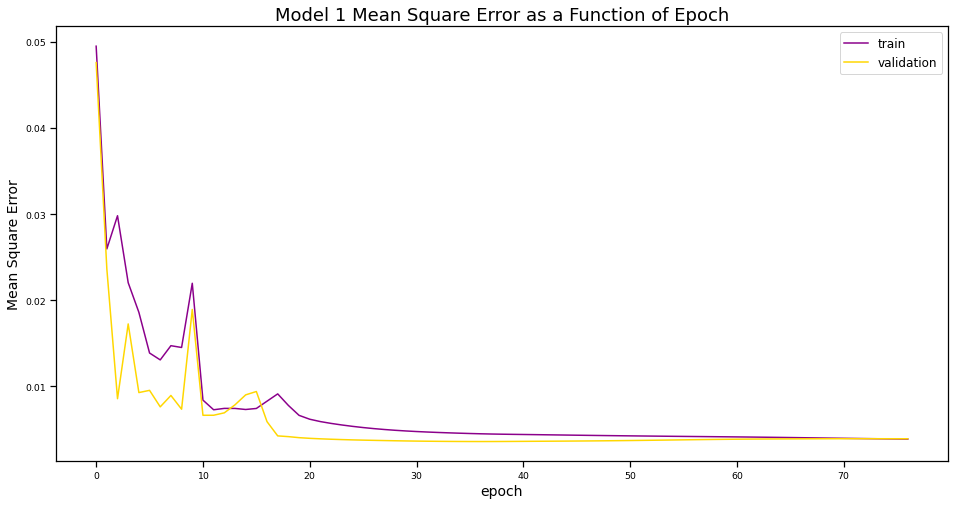

In [24]:
plt.figure(figsize=(16,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot the first neural network model's MSE as a function of epoch:
plt.plot(model_history_1.history['loss'], color = 'darkmagenta')
plt.plot(model_history_1.history['val_loss'], color = 'gold')
# Give the plot a legend:
plt.legend(['train', 'validation'], loc='upper right', fontsize = 12)
# Label the plot axes with informative labels:
plt.ylabel('Mean Square Error', fontsize = 14)
plt.xlabel('epoch', fontsize = 14)
# Give the figure an informative title:
plt.title('Model 1 Mean Square Error as a Function of Epoch', fontsize = 18)
# Save the figure to file:
plt.savefig('model_1_MSE.png')
# Display the plot:
plt.show()

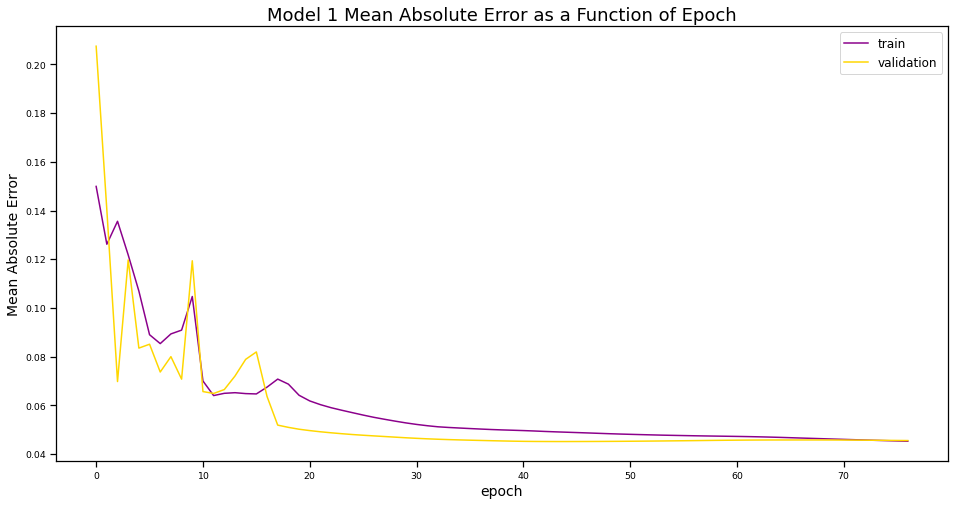

In [25]:
plt.figure(figsize=(16,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot the first neural network's MAE as a function of epoch:
plt.plot(model_history_1.history['mae'], color = 'darkmagenta')
plt.plot(model_history_1.history['val_mae'], color = 'gold')
# Give the plot a legend:
plt.legend(['train', 'validation'], loc='upper right', fontsize = 12)
# Label the plot axes with informative labels:
plt.ylabel('Mean Absolute Error', fontsize = 14)
plt.xlabel('epoch', fontsize = 14)
# Give the figure an informative title:
plt.title('Model 1 Mean Absolute Error as a Function of Epoch', fontsize = 18)
# Save the figure to file:
plt.savefig('model_1_MAE.png')
# Display the plot:
plt.show()

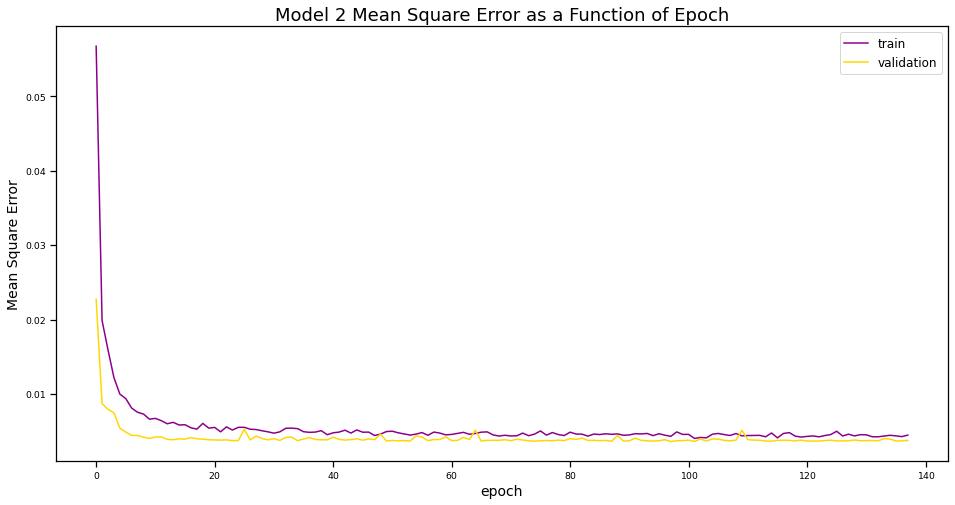

In [26]:
plt.figure(figsize=(16,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot the second neural network model's MSE as a function of epoch:
plt.plot(model_history_2.history['loss'], color = 'darkmagenta')
plt.plot(model_history_2.history['val_loss'], color = 'gold')
# Give the plot a legend:
plt.legend(['train', 'validation'], loc='upper right', fontsize = 12)
# Label the plot axes with informative labels:
plt.ylabel('Mean Square Error', fontsize = 14)
plt.xlabel('epoch', fontsize = 14)
# Give the figure an informative title:
plt.title('Model 2 Mean Square Error as a Function of Epoch', fontsize = 18)
# Save the figure to file:
plt.savefig('model_2_MSE.png')
# Display the plot:
plt.show()

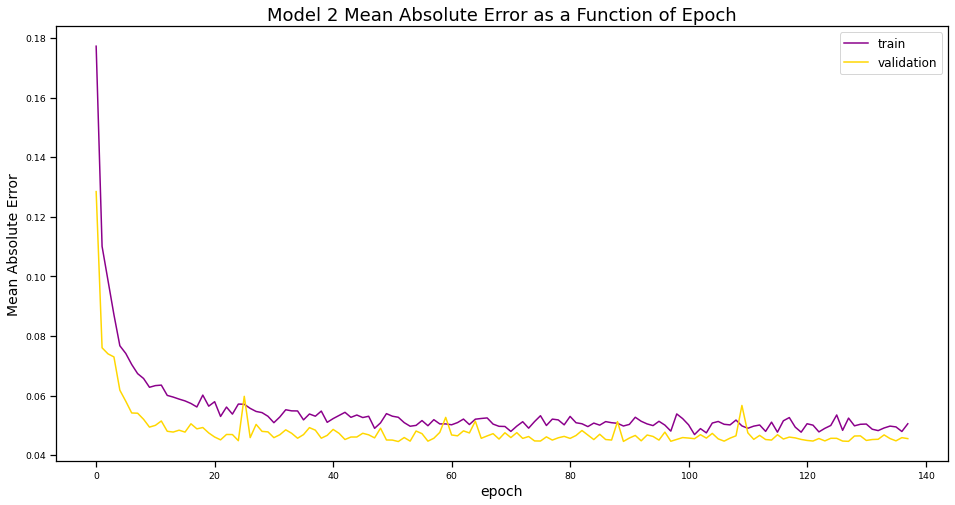

In [27]:
plt.figure(figsize=(16,8))
# Set "context" of notebook to control the font size of tick labels:
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Plot the second neural network's MAE as a function of epoch:
plt.plot(model_history_2.history['mae'], color = 'darkmagenta')
plt.plot(model_history_2.history['val_mae'], color = 'gold')
# Give the plot a legend:
plt.legend(['train', 'validation'], loc='upper right', fontsize = 12)
# Label the plot axes with informative labels:
plt.ylabel('Mean Absolute Error', fontsize = 14)
plt.xlabel('epoch', fontsize = 14)
# Give the figure an informative title:
plt.title('Model 2 Mean Absolute Error as a Function of Epoch', fontsize = 18)
# Save the figure to file:
plt.savefig('model_2_MAE.png')
# Display the plot:
plt.show()

***
<a id="Section10"></a> 

<h3 style="text-align:center"> Conclusions </h3> <br>
In this project, I used the data from Mohan S. Archarya's <a href = "https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv"> Kaggle repository</a> and some hints from Codecademy to build two different neural network regression models which predict a student's chances of admittance to a Master’s Degree graduate school program. Neural Network Model 1 consisted of 1 hidden layer of 256 neurons with a sigmoid activation function and no drop-out layer; Neural Network Model 2 consisted of 2 hidden layers of 16 neurons a piece, with dropout layers after each hidden layer and with each hidden layer having a sigmoid activation function. Both neural network models used an Adam optimization algorithm as their optimizer. These two models were compared with a multi-variable linear regression model and a k-Nearest Neighbours regression model. In terms of model Mean Square Error, Mean Absolute Error, and "goodness of fit," the multi-variable linear regression model had the best performance; it was also the fastest model to compute. However, the performances of the multi-variable linear regression model, Neural Network Model 1, and Neural Network Model 2 were all very comparable. <br>
<br>
Given the small size of the data set, as well as the strong association between "Chance of Admit" and the continuous quantitative variables in it, I am entirely unsurprised that the multi-variable linear regression model gave the best description of the data. The power of neural network models is most apparent when data sets are very large, and that is certainly not the case here. However, that is almost beside the point for this project. Codecademy chose a small data set for the learner's first foray into building neural network models because the models can be built and trained fairly quickly, and the developers knew that this particular data set would yield good results because of the strong associations of the variables with "Chance of Admit." Thus, I feel it was a good choice of data set for a first project, and the fact that the regression could be done with a much simpler model pales in comparison to its advantages for building a first neural network model.

***
<a id="Section11"></a> 

<h3 style="text-align:center"> Acknowledgements </h3> <br>
I am happy to cite Mr. Acharya's paper about this data set:<br>
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019<br>
I would like to thank Mr. Acharya for compiling it and releasing it into the Public Domain.<br>
I would also like to thank Codecademy for putting together this project, including some hints along the way, as part of their " " skill path.